<a href="https://colab.research.google.com/github/udayasathwika06/Task7_elevatelabs/blob/main/task7_script.py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📦 Sales Summary:

    product  total_qty  revenue
0  Notebook         60    180.0
1       Pen        100    150.0
2    Pencil        200    100.0


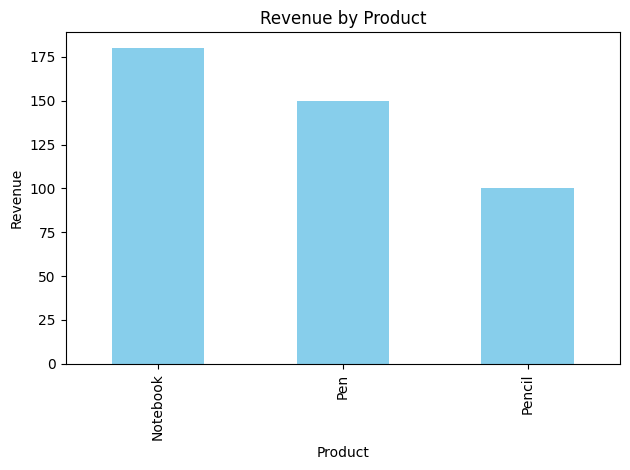

In [1]:
# task7_script.py

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Create or connect to database
conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()

# Step 2: Create the sales table
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY,
    product TEXT NOT NULL,
    quantity INTEGER NOT NULL,
    price REAL NOT NULL
)
''')

# Step 3: Insert sample data (run only once to avoid duplicates)
sample_data = [
    ('Pen', 10, 1.5),
    ('Pencil', 20, 0.5),
    ('Notebook', 5, 3.0),
    ('Pen', 15, 1.5),
    ('Pencil', 30, 0.5),
    ('Notebook', 10, 3.0)
]
cursor.executemany('INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)', sample_data)

# Save and close insert step
conn.commit()

# Step 4: Query total quantity and revenue by product
query = '''
SELECT
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
'''

df = pd.read_sql_query(query, conn)
conn.close()

# Step 5: Print the summary
print("📦 Sales Summary:\n")
print(df)

# Step 6: Plot revenue by product (fixed)
df.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()